In [1]:
# load the POI and check what's included
import os
import pandas as pd
import numpy as np
import geopandas as gpd

# Clean up the POI data by type.
1. Bus stations
2. Grocery/supermarket
3. School/kindergarden
4. laundry
5. work
6. park

In [22]:
FOLDER = "/lustre1/g/geog_pyloo/05_timemachine/_raw/r_pois"
T_FOLDER = "/lustre1/g/geog_pyloo/05_timemachine/_transformed/t_pois"
if not os.path.exists(T_FOLDER):
    os.makedirs(T_FOLDER)
city = "newyork"
cityabbr = city.lower().replace(" ", "")
gdf = gpd.read_file(os.path.join(FOLDER, f"{cityabbr}.geojson"))
gdf.head()

,element_type,osmid,highway,amenity,backrest,ferry,name,operator,public_transport,access,...,footway,informal,ways,alt_name:fr,place,biergarten,alt_name:etymology,lighting,permit,geometry
0,node,42538083,None,bench,yes,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-73.97070 40.67335)
1,node,42723103,None,ferry_terminal,None,yes,Hart Island Ferry Terminal,NYC Department of Corrections,station,None,...,None,None,None,None,None,None,None,None,None,POINT (-73.77268 40.85218)
2,node,42808233,None,parking_entrance,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-73.78430 40.68826)
3,node,42932643,None,parking,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-73.77275 40.71540)
4,node,46884313,None,parking_entrance,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,POINT (-73.77934 40.64551)


In [23]:
col_keep = ["osmid","element_type","name", "type", "geometry","amenity"]
gdf[col_keep]

,osmid,element_type,name,type,geometry,amenity
0,42538083,node,None,None,POINT (-73.97070 40.67335),bench
1,42723103,node,Hart Island Ferry Terminal,None,POINT (-73.77268 40.85218),ferry_terminal
2,42808233,node,None,None,POINT (-73.78430 40.68826),parking_entrance
3,42932643,node,None,None,POINT (-73.77275 40.71540),parking
4,46884313,node,None,None,POINT (-73.77934 40.64551),parking_entrance
...,...,...,...,...,...,...
154285,18114113,relation,None,multipolygon,"POLYGON ((-74.08916 40.62847, -74.08916 40.628...",parking
154286,18114114,relation,None,multipolygon,"POLYGON ((-74.08951 40.62838, -74.08951 40.628...",parking
154287,18123593,relation,None,multipolygon,"POLYGON ((-74.22305 40.54766, -74.22305 40.547...",parking
154288,18136083,relation,None,multipolygon,"POLYGON ((-74.22210 40.54839, -74.22209 40.548...",parking


In [27]:
col_keep = ["osmid","element_type","name", "type", "geometry","amenity"]
gdf[col_keep].to_file(os.path.join(FOLDER, f"{cityabbr}.geojson"), driver="GeoJSON")

In [17]:
gdf[col_keep].to_file(os.path.join(T_FOLDER, f"{cityabbr}.geojson"), driver="GeoJSON")

,element_type,name,type,geometry,osmid,name,amenity
0,node,None,None,POINT (114.16730 22.28088),32946825,None,taxi
1,node,小田泰式雞飯店,None,POINT (114.17737 22.27709),165998818,小田泰式雞飯店,restaurant
2,node,尖沙咀碼頭 Star Ferry,None,POINT (114.16897 22.29414),245090969,尖沙咀碼頭 Star Ferry,bus_station
3,node,None,None,POINT (114.21928 22.24113),257006964,None,toilets
4,node,None,None,POINT (114.20423 22.24100),259968975,None,telephone
...,...,...,...,...,...,...,...
26066,relation,城門隧道轉車站 Shing Mun Tunnels Bus Interchange,multipolygon,"MULTIPOLYGON (((114.13734 22.38186, 114.13734 ...",15883521,城門隧道轉車站 Shing Mun Tunnels Bus Interchange,bus_station
26067,relation,屯門客運碼頭 Tuen Mun Ferry Terminal,multipolygon,"POLYGON ((113.96592 22.37186, 113.96595 22.371...",16057655,屯門客運碼頭 Tuen Mun Ferry Terminal,ferry_terminal
26068,relation,莊園大宅 The Manor House,multipolygon,"POLYGON ((113.98471 22.37649, 113.98483 22.376...",16327434,莊園大宅 The Manor House,events_venue
26069,relation,None,multipolygon,"POLYGON ((114.03160 22.44350, 114.03160 22.443...",17670900,None,parking


In [26]:
gdf['public_transport'].unique()

array([None, 'station', 'stop_position', 'no', 'platform'], dtype=object)

In [8]:
gdf['amenity'].value_counts().reset_index().to_csv(f"{cityabbr}_amenity.csv", index=False)

<Axes: >

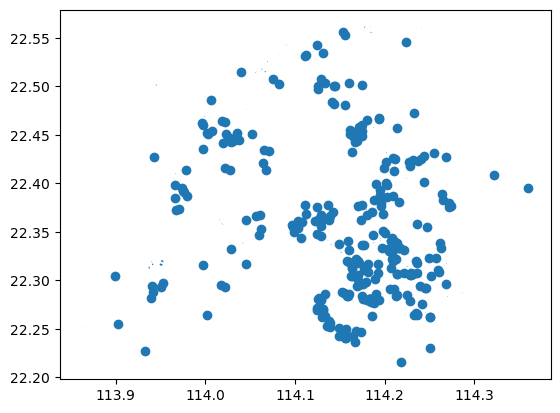

In [12]:
gdf[gdf['amenity'].str.contains("bus", case=False)].plot()